# Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import scipy.stats

The data are going to be classified into the 3 categories as [0 1 2].



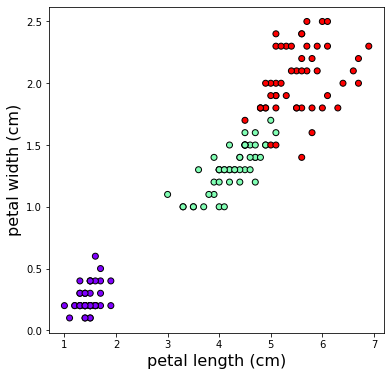

In [2]:
# load the Iris dataset
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:,2:4]
y = iris.target

# identify the categories to classify
y_unique = np.unique(y)
print('The data are going to be classified into the {} categories as {}.\n'.format(len(y_unique), y_unique))

# visualize the dataset
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='rainbow')
plt.xlabel(iris.feature_names[2], fontsize=16)
plt.ylabel(iris.feature_names[3], fontsize=16)
plt.show()

### Naive Bayes

In [3]:
# Naive Bayes classifer
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB().fit(X, y)

# try a test data Xtest with two points
Xtest = [[5, 1.5], 
         [1.6, 5.2]]

# make predictionson the test data
predictions = nb_model.predict(Xtest)

# get the probability estimates for each category of each test data
predictions_proba = nb_model.predict_proba(Xtest)

# print out the results  
for i in range(len(Xtest)):       
    print("\nThe test data point {} is classified to Category {} by Naive Bayes.".format(Xtest[i], predictions[i]))      
    print("Below is the probability estimates for each category:")    
    for j in range(len(predictions_proba[i])):       
        print("Category {}: {:5.4f}".format(j, predictions_proba[i,j]))


The test data point [5, 1.5] is classified to Category 1 by Naive Bayes.
Below is the probability estimates for each category:
Category 0: 0.0000
Category 1: 0.7704
Category 2: 0.2296

The test data point [1.6, 5.2] is classified to Category 2 by Naive Bayes.
Below is the probability estimates for each category:
Category 0: 0.0000
Category 1: 0.0000
Category 2: 1.0000


In [4]:
# define a function to run the test data, Xtest, and print out the results
def predict_test(Xtest, classifier, model_name):

    # make predictionson the test data
    predictions = classifier.predict(Xtest)

    # check if the probability estimates are available
    if hasattr(classifier, "predict_proba"):
        predictions_proba = classifier.predict_proba(Xtest)
        prob_estimate = True 
    else:
        prob_estimate = False    

    # print out the results  
    for i in range(len(Xtest)):       
        print("\nThe test data point {} is classified to Category {} by {}.".format(Xtest[i], predictions[i], model_name))      
        if prob_estimate == True:
            print("Below is the probability estimates for each category:")    
            for j in range(len(predictions_proba[i])):       
                print("Category {}: {:5.4f}".format(j, predictions_proba[i,j]))
    
    return

In [5]:
# try a test data Xtest with two points
Xtest = [[5, 1.5], [1.6, 5.2]]
model_name = "Naive Bayes"

# call the predict_test function to predict the test data
predict_test(Xtest, nb_model, model_name)


The test data point [5, 1.5] is classified to Category 1 by Naive Bayes.
Below is the probability estimates for each category:
Category 0: 0.0000
Category 1: 0.7704
Category 2: 0.2296

The test data point [1.6, 5.2] is classified to Category 2 by Naive Bayes.
Below is the probability estimates for each category:
Category 0: 0.0000
Category 1: 0.0000
Category 2: 1.0000


In [6]:
# Naive Bayes with a prior given below
prior = np.array([0.33, 0.33, 0.34])
nbp_model = GaussianNB(priors=prior)
nbp_model.fit(X, y)

# call the predict_test function to predict the test data
Xtest = [[5, 1.5], [1.6, 5.2]]
model_name = "Naive Bayes with the prior "+str(prior)
predict_test(Xtest, nbp_model, model_name)


The test data point [5, 1.5] is classified to Category 1 by Naive Bayes with the prior [0.33 0.33 0.34].
Below is the probability estimates for each category:
Category 0: 0.0000
Category 1: 0.7651
Category 2: 0.2349

The test data point [1.6, 5.2] is classified to Category 2 by Naive Bayes with the prior [0.33 0.33 0.34].
Below is the probability estimates for each category:
Category 0: 0.0000
Category 1: 0.0000
Category 2: 1.0000


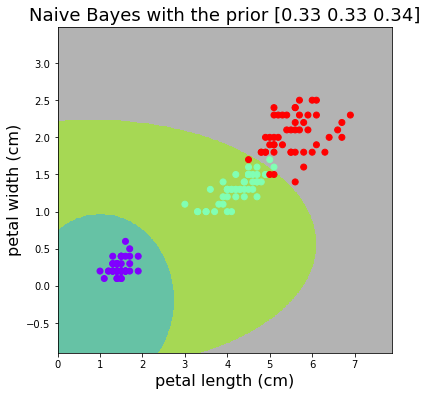

In [7]:
# plot the decision boundary of Naive Bayes model by assigning a color to each point in the mesh 

# first define a function to make mesh grid and get predictions
def meshgrid_predict(x, y, h, classifier):   
    """Create a mesh of points to plot in"""
    # define the min and max of the ranges
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    # create mesh grid and make predictions using the classifier
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    return xx, yy, Z

def make_plot(xx, yy, Z, X, y, model_name):

    # plot the decision boundary
    plt.figure(1, figsize=(6,6))
    plt.pcolormesh(xx, yy, Z, shading='auto', cmap='Set2')

    # plot the training dataset
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='face', cmap='rainbow')
    #an alternative of plotting the dataset is using the lines below
    #plt.scatter(X[y==0, 0], X[y==0, 1], c='c')
    #plt.scatter(X[y==1, 0], X[y==1, 1], c='r')
    #plt.scatter(X[y==2, 0], X[y==2, 1], c='aqua')

    plt.title(model_name, fontsize=18)
    plt.xlabel(iris.feature_names[2], fontsize=16)
    plt.ylabel(iris.feature_names[3], fontsize=16)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    return

# set the step size of the mesh grid as h
h = 0.01  

# call the function meshgrid_predict to generate the grid data
xx, yy, Z = meshgrid_predict(X[:, 0], X[:, 1], h, nb_model)
make_plot(xx, yy, Z, X, y, model_name)
plt.show()

### K-Nearest Neighbors

In [8]:
# import KNN classifier
from sklearn.neighbors import KNeighborsClassifier

# n_neighborsint is for number of neighbors
# p is the power parameter for the Minkowski metric
knn_model = KNeighborsClassifier(n_neighbors=5, p=2).fit(X, y)

# call the predict_test function to predict the test data
Xtest = [[5, 1.5], [1.6, 5.2]]
model_name = "KNN"
predict_test(Xtest, knn_model, model_name)


The test data point [5, 1.5] is classified to Category 1 by KNN.
Below is the probability estimates for each category:
Category 0: 0.0000
Category 1: 0.6000
Category 2: 0.4000

The test data point [1.6, 5.2] is classified to Category 1 by KNN.
Below is the probability estimates for each category:
Category 0: 0.0000
Category 1: 0.8000
Category 2: 0.2000


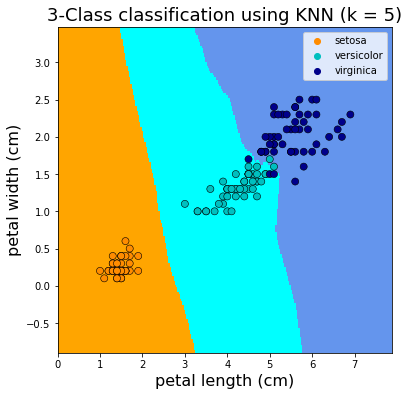

In [9]:
# plot the decision boundary of the KNN classifier
from seaborn import scatterplot
from matplotlib.colors import ListedColormap

# set the step size of the mesh grid as h
h = 0.03  

# call the function meshgrid_predict to generate the grid data
xx, yy, Z = meshgrid_predict(X[:, 0], X[:, 1], h, knn_model)

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

# plot the decision boundary
plt.figure(1, figsize=(6,6))
plt.pcolormesh(xx, yy, Z, shading='auto', cmap=cmap_light)

# plot the training dataset
scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y], s=50,
            palette=cmap_bold, alpha=1.0, edgecolor="black")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification using KNN (k = 5)", fontsize=18)
plt.xlabel(iris.feature_names[2], fontsize=16)
plt.ylabel(iris.feature_names[3], fontsize=16)
plt.show()

# note that we could also make this plot using matplotlib as in the previous example.

### Decision Tree

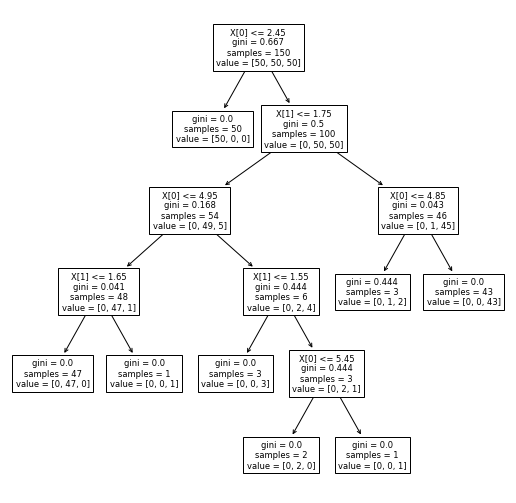

In [10]:
# Decision tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# build and train a decision with the maximum depth of 5
dt_model = DecisionTreeClassifier(max_depth = 5).fit(X, y)

# plot the trained decision tree
plt.figure(figsize=(9,9))  # set plot size (denoted in inches)
tree.plot_tree(dt_model)
plt.show()

In [11]:
# call the predict_test function to predict the test data with two points
Xtest = [[5, 1.5], [1.6, 5.2]]
model_name = "decision tree"
predict_test(Xtest, dt_model, model_name)


The test data point [5, 1.5] is classified to Category 2 by decision tree.
Below is the probability estimates for each category:
Category 0: 0.0000
Category 1: 0.0000
Category 2: 1.0000

The test data point [1.6, 5.2] is classified to Category 0 by decision tree.
Below is the probability estimates for each category:
Category 0: 1.0000
Category 1: 0.0000
Category 2: 0.0000


### Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

# Create an instance of Logistic Regression Classifier and fit the data.
lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr_model.fit(X, y)

# call the predict_test function to predict the test data
Xtest = [[5, 1.5], [1.6, 5.2]]
model_name = "Logistic Regression"
predict_test(Xtest, lr_model, model_name)     


The test data point [5, 1.5] is classified to Category 1 by Logistic Regression.
Below is the probability estimates for each category:
Category 0: 0.0007
Category 1: 0.5487
Category 2: 0.4506

The test data point [1.6, 5.2] is classified to Category 2 by Logistic Regression.
Below is the probability estimates for each category:
Category 0: 0.4559
Category 1: 0.0609
Category 2: 0.4831


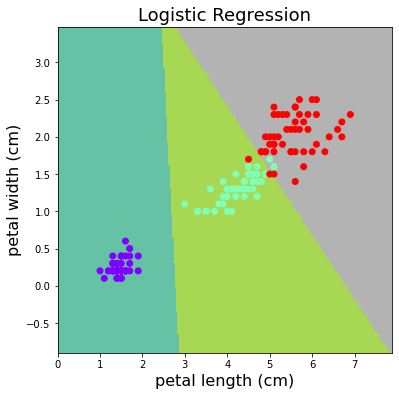

In [13]:
# plot the decision boundary of the logistic regression model 

h = 0.03  # set the step size of the mesh grid as h

# call the function meshgrid_predict to generate the grid data
xx, yy, Z = meshgrid_predict(X[:, 0], X[:, 1], h, lr_model)
make_plot(xx, yy, Z, X, y, model_name)
plt.show()

### Linear SVM

In [14]:
# import SVM package
from sklearn.svm import SVC

# choose the linear kernel for linear SVM
lsvm_model = SVC(kernel='linear').fit(X, y)
lsvm_model.fit(X, y)

# call the predict_test function to predict the test data
Xtest = [[5, 1.5], [1.6, 5.2]]
model_name = "Linear SVM"
predict_test(Xtest, lsvm_model, model_name)     


The test data point [5, 1.5] is classified to Category 1 by Linear SVM.

The test data point [1.6, 5.2] is classified to Category 2 by Linear SVM.


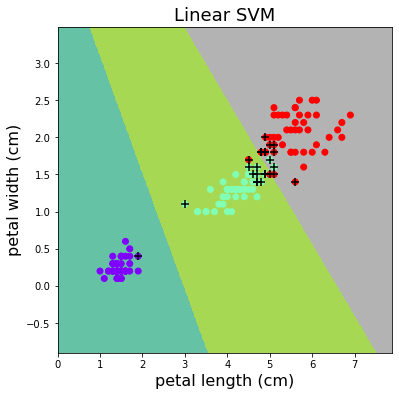

In [15]:
# set the step size of the mesh grid as h
h = 0.01

# call the function meshgrid_predict to generate the grid data
xx, yy, Z = meshgrid_predict(X[:, 0], X[:, 1], h, lsvm_model)
make_plot(xx, yy, Z, X, y, model_name)

# get the support vectors
sv = lsvm_model.support_vectors_
# plot the support vectors on the scatter plot
plt.scatter(sv[:,0], sv[:,1], marker='+', s=70, color='k')

plt.show()

### Kernel SVM

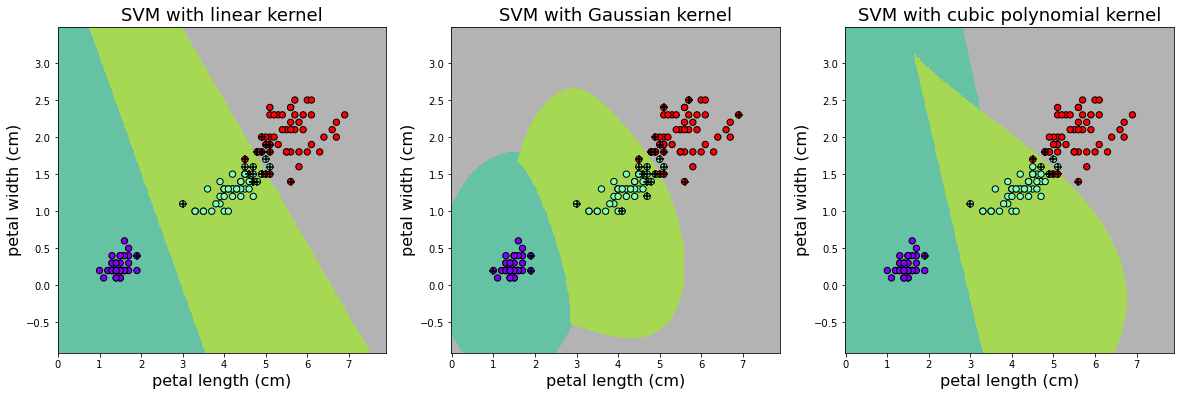

In [16]:
# set the SVM regularization parameter
C = 1.0  

ksvm_models = (SVC(kernel='linear', C=C),
               SVC(kernel='rbf', gamma=0.7, C=C),
               SVC(kernel='poly', degree=3, gamma='auto', C=C))

ksvm_models = (classifier.fit(X, y) for classifier in ksvm_models)

# title for the plots
titles = ('SVM with linear kernel',
          'SVM with Gaussian kernel',
          'SVM with cubic polynomial kernel')

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))
fig.subplots_adjust(wspace=0.2)

# set the step size of the mesh grid as h
h = 0.02

for model, title, ax in zip(ksvm_models, titles, axes):
    # call the function meshgrid_predict to generate the grid data
    xx, yy, Z = meshgrid_predict(X[:, 0], X[:, 1], h, model)
    ax.pcolormesh(xx, yy, Z, shading='auto', cmap='Set2')
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow', s=40, edgecolors='k')
    sv = model.support_vectors_
    ax.scatter(sv[:,0], sv[:,1], marker='+', s=60, color='k')
    ax.set_xlabel(iris.feature_names[2], fontsize=16)
    ax.set_ylabel(iris.feature_names[3], fontsize=16)
    ax.set_title(title, fontsize=18)

plt.show()

## Random Forest Classifier


The test data point [5, 1.5] is classified to Category 2 by Random Forest Classifier.
Below is the probability estimates for each category:
Category 0: 0.0000
Category 1: 0.3000
Category 2: 0.7000

The test data point [1.6, 5.2] is classified to Category 0 by Random Forest Classifier.
Below is the probability estimates for each category:
Category 0: 0.4000
Category 1: 0.3500
Category 2: 0.2500


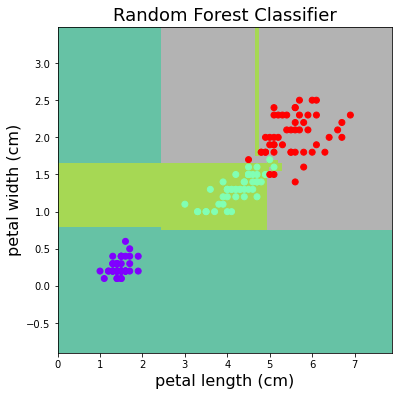

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest Classifier and fit the data; n_estimators is the number of trees in the forest.
rf_model = RandomForestClassifier(n_estimators = 10, criterion = "entropy")
rf_model.fit(X, y)

# call the predict_test function to predict the test data
Xtest = [[5, 1.5], [1.6, 5.2]]
model_name = "Random Forest Classifier"
predict_test(Xtest, rf_model, model_name)   

# plot the decision boundary of the logistic regression model 
h = 0.01  
xx, yy, Z = meshgrid_predict(X[:, 0], X[:, 1], h, rf_model)
make_plot(xx, yy, Z, X, y, model_name)
plt.show()

## AdaBoost (Adaptive Boosting)


The test data point [5, 1.5] is classified to Category 2 by AdaBoost Classifier.
Below is the probability estimates for each category:
Category 0: 0.0000
Category 1: 0.4991
Category 2: 0.5009

The test data point [1.6, 5.2] is classified to Category 2 by AdaBoost Classifier.
Below is the probability estimates for each category:
Category 0: 0.0000
Category 1: 0.4973
Category 2: 0.5027


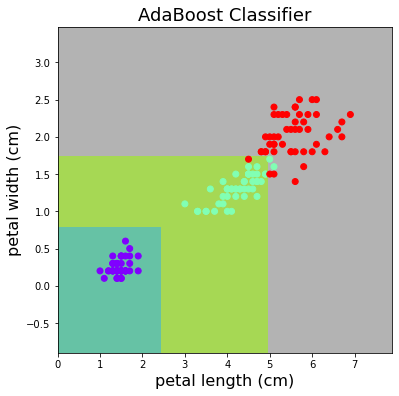

In [18]:
from sklearn.ensemble import AdaBoostClassifier

# Create an AdaBoost Classifier using decision trees as the base estimator
abt_model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                               n_estimators=200)
abt_model.fit(X, y)

# call the predict_test function to predict the test data
Xtest = [[5, 1.5], [1.6, 5.2]]
model_name = "AdaBoost Classifier"
predict_test(Xtest, abt_model, model_name)   

# plot the decision boundary of the logistic regression model 
h = 0.03  
xx, yy, Z = meshgrid_predict(X[:, 0], X[:, 1], h, abt_model)
make_plot(xx, yy, Z, X, y, model_name)
plt.show()

## Gradient Boosting Classifier


The test data point [5, 1.5] is classified to Category 2 by Gradient Boosting Classifier.
Below is the probability estimates for each category:
Category 0: 0.0001
Category 1: 0.1338
Category 2: 0.8661

The test data point [1.6, 5.2] is classified to Category 2 by Gradient Boosting Classifier.
Below is the probability estimates for each category:
Category 0: 0.0085
Category 1: 0.0015
Category 2: 0.9900


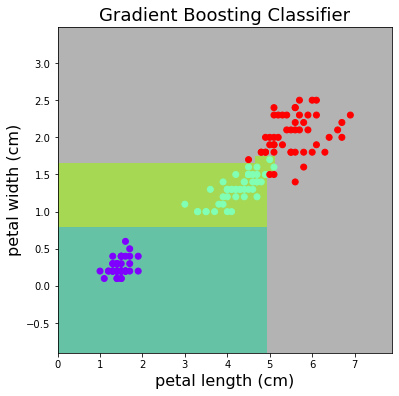

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

# Create an Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=2)

gb_model.fit(X, y)

# call the predict_test function to predict the test data
Xtest = [[5, 1.5], [1.6, 5.2]]
model_name = "Gradient Boosting Classifier"
predict_test(Xtest, gb_model, model_name)   

# plot the decision boundary of the logistic regression model 
h = 0.01  
xx, yy, Z = meshgrid_predict(X[:, 0], X[:, 1], h, gb_model)
make_plot(xx, yy, Z, X, y, model_name)
plt.show()

## XGBoost for Classification

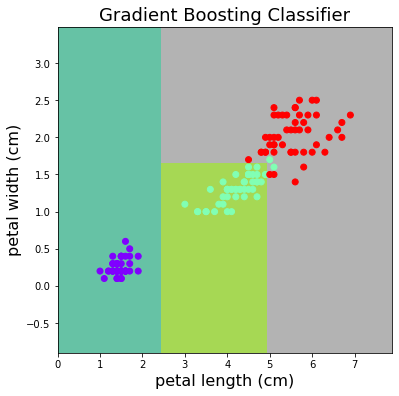

In [20]:
import xgboost as xgb

# Create an Gradient Boosting Classifier
xgb_model = xgb.XGBClassifier(objective="multi:softprob", 
                              n_estimators = 100,
                              n_jobs = 3, # replace "nthread"
                              verbosity = 0, # add this line to slient warning message                              
                              learning_rate = 1e-3,
                              use_label_encoder=False)

xgb_model.fit(X, y)

# plot the decision boundary of the logistic regression model 
h = 0.01  
xx, yy, Z = meshgrid_predict(X[:, 0], X[:, 1], h, xgb_model)
make_plot(xx, yy, Z, X, y, model_name)
plt.show()

## Classifier Comparison

In [21]:
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification, make_moons, make_circles

from sklearn.neural_network import MLPClassifier

# names and packages of the classifiers for comparison
names = ["Naive Bayes", 
         "KNN (K=3)",  
         "Decision Tree", 
         "Logistic Regression", 
         "Linear SVM", 
         "Kernel SVM", 
         "Random Forest", 
         "AdaBoost", 
         "Gradient Boosting",
         "XGBoost",
         "Neural Net / MLP"]

classifiers = [
    GaussianNB(),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(max_depth=5),
    LogisticRegression(),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=2),
    xgb.XGBClassifier(n_estimators=100, verbosity=0, njobs=3, use_label_encoder=False),
    MLPClassifier(alpha=1, max_iter=1000) ]


# the 1st data set is a randomly generated n-class classification problem
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

# the 2nd and 3rd datasets are the standard make_moons and make_circles datasets
datasets = [linearly_separable,
            make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1)            
            ]

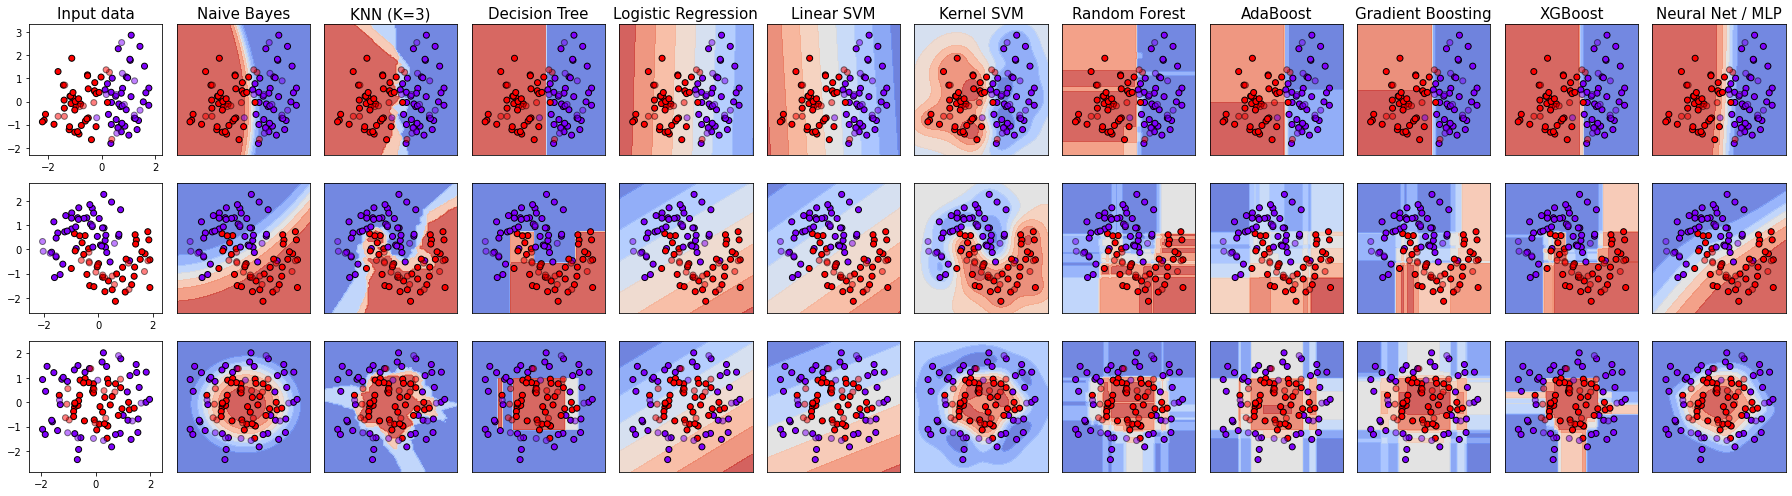

In [22]:

# set the step size in the mesh
h = .05  

figure = plt.figure(figsize=(25, 7))

i = 1

# iterate over datasets
for ds_count, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    
    # standardize the dataset by removing the mean and scaling to unit variance
    X = StandardScaler().fit_transform(X)
    
    # split the training and test datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=8)

    # get the ranges of data for plotting the meshgrid
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # plot the dataset first    
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_count == 0:
        ax.set_title("Input data", fontsize=15)
        
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='rainbow', edgecolors='k')   
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='rainbow', alpha=0.5, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    
    # move on to the next subplot
    i += 1

    # iterate over classifiers
    for name, model in zip(names, classifiers):
        # index the subplot by i
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        
        # train the model and output Z as the density value (instead of prediction)
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        if hasattr(model, "decision_function"):
            Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # plot the density map by Z values
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap='coolwarm', alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='rainbow', edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='rainbow', edgecolors='k', alpha=0.5)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())

        if ds_count == 0:
            ax.set_title(name, fontsize=15)
        ax.set_xticks([]) 
        ax.set_yticks([]) 
        
        i += 1

plt.tight_layout()
plt.show()